<a href="https://colab.research.google.com/github/Siripurapu-VighnaChaitanya/ML_practice_files/blob/main/spam%20detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
dataset=pd.read_csv('spam.csv',encoding='latin-1')

In [4]:
dataset.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
dataset.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [6]:
dataset.columns

Index(['v1', 'v2'], dtype='object')

In [7]:
dataset['v1']=dataset['v1'].map({'ham':0,'spam':1})

In [8]:
dataset.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
dataset['v2'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
corpus=[]
print(corpus)

[]


In [12]:
for i in range(len(dataset)):
  message=re.sub(r'[^a-zA-Z]',' ',dataset['v2'][i])
  message=message.lower()
  message=message.split()
  sc=SnowballStemmer(language='english')
  message=[sc.stem(word) for word in message if word not in set(stopwords.words('english'))]
  message=' '.join(message)
  corpus.append(message)

In [13]:
len(corpus)

5572

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer()
X=tv.fit_transform(corpus).toarray()
y=dataset.iloc[:,0].values

In [16]:
X.shape

(5572, 6216)

In [17]:
y.shape

(5572,)

In [18]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [21]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [22]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),axis=1)

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

0.9775784753363229

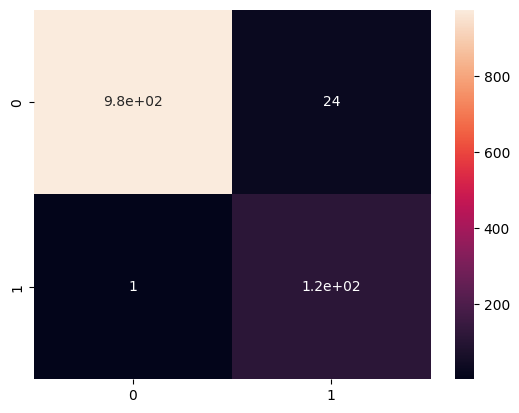

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_pred,y_test)
sb.heatmap(cm,annot=True)
accuracy_score(y_pred,y_test)

In [53]:
text="Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's."
random_text=np.array(text).reshape(1,)

In [54]:
random_text.shape

(1,)

In [55]:
random_pred=tv.transform(random_text)

In [56]:
random_pred.shape

(1, 6216)

In [57]:
print(classifier.predict(random_pred))

[1]
